In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from summarytools import dfSummary
import numpy as np 
import seaborn as sns


In [2]:
# load the first sheet 
file = r"C:\Users\Orezime Isaac\Downloads\Customer_Churn_Data_Large.xlsx"
df1 = pd.read_excel(file, sheet_name='Transaction_History') 
df1

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing
...,...,...,...,...,...
5049,1000,2724,2022-09-08,232.06,Groceries
5050,1000,2917,2022-12-13,324.98,Books
5051,1000,2979,2022-06-15,375.34,Groceries
5052,1000,8594,2022-04-08,166.73,Books


In [3]:
# load the second sheet 
df2 = pd.read_excel(file, sheet_name='Customer_Service')
df2

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved
...,...,...,...,...,...
997,990,3671,2022-10-25,Complaint,Unresolved
998,992,2114,2022-09-29,Feedback,Unresolved
999,994,3087,2022-07-02,Complaint,Unresolved
1000,994,8508,2022-05-14,Complaint,Unresolved


In [4]:
# load the third sheet 
df3 = pd.read_excel(file, sheet_name='Online_Activity')
df3

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website
...,...,...,...,...
995,996,2023-01-29,38,Mobile App
996,997,2023-04-01,5,Mobile App
997,998,2023-07-10,47,Website
998,999,2023-01-08,23,Website


In [5]:
# load the third sheet 
df4 = pd.read_excel(file, sheet_name='Churn_Status')
df4 

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


In [6]:
# Merged all four dataframes
merged_df = df1.merge(df2, on='CustomerID', how='left')\
                .merge(df3, on='CustomerID', how='left')\
                .merge(df4, on='CustomerID', how='left')
                
# Display final dataframe
merged_df

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6808,1000,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6809,1000,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6810,1000,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0


In [7]:
dfSummary(merged_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int64],Mean (sd) : 500.2 (286.7)min < med < max:1.0 < 505.5 < 1000.0IQR (CV) : 503.0 (1.7),"1,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmlJREFUeJzt2kFu2kAYhmFP7QQXkC2EBDsuUKkLlj5ED9sjZMEJuAE7JGQZ4cSyMa7cfVMYBzyfeZ81E0ajN7/HUUzTNB7gum99bwC4RnDVpyDDGPPd87xXy+Vl0zQfnoMIdWCRzufzX1EUzWzWH4/H1Bjz28VYCXVYU+21jTRJko84jotbFmZZFm42m9nhcGj3TahD58JUi+O4WCwW7xZL218wJwUOT5Ze70wd9h5Np9NFkiTHoU21QYbadbL0eWfqsveqqsK6rn+MRqO3oU21oU5U6/uSA9PFeu+73W623W7H5/PZt/niuq5f2qlsjLFZHl0ul3b984Xa5RHYHlocx6nlZOl9utjc9dI0td5znucvVVX9XK1Wvu/7he00L4rizfM82zPXC/UrHoFdDq3jdHH2b4L/UpZlEIbheL1eF8vlMr11/a7faX7XMw9cfQR2nS4u/03wfyaTidVbe9rjNL/3mQcuPgK7Thfenh8/ze995sFQp0td1xEvJY877y8480+vDc6HaoOXkse791VtkKH2/VLyjMo7X9UGGWqfLyXPbmJ/dfj0zPl/VEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEgIrvlQlmXhrT/4dDr9XZPnebjf78ePXK/63ar79jquv6avPxJptKaT0rlmAAAAAElFTkSuQmCC"">",0(0.0%)
2,TransactionID[int64],Mean (sd) : 5497.3 (2584.8)min < med < max:1000.0 < 5515.0 < 9997.0IQR (CV) : 4451.8 (2.1),"3,864 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAoZJREFUeJzt2kFu2kAARuGZYoIL1AgRwY4LVOqCpTe9QQ/bbXdBChfgBmwQkmVA0FgY48pVK3VXsGPsH79vzcSjmedhEsWmaWqAuvtQ9QSAazhXfaqBrLUfjTFPOYef0jR9e+cpNZpT482ubMOzeY9Go2+e5w3zjN/v96G19juxCoRadLMr3vCnbN6+778NBoPoloG73c6dz+fjIAierbX7HM/mNL7ziZp7s/9u+Ovr6zAIguxErmTjsnmPx+Oft4w5Ho/tOI6/TKfTVqvViu79ctoHvbI4ddzsf2SLLuV0Ojmu63Zns1k0mUzCe76c9oGvLE6Jb6h3uVzapqF6vV6uFzRJEi9bO2ttnsd6/X5/7Pv+Ps+Vpeg3WJmnuVPWGxrHsZskyecoil6MMXlP1EYpem2I/6x5p9N5yfktlvsbrOzT3CnrnrlarYbL5bJ7Pp9bN824wYpcG95jzZMkadf1NHfKumeGYVj4fllw4Wr7i0FZ14awwJrX/TSv7R/8iy7cdrs9WGt/GGNuHtvE+/Wp4tP8f5xHXLj1ev1psVh8nU6nz0VOhyber3sVnObSoRZZuGzR6nw64AFDfcTTAbfjv6cggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhwbnmQ7vdzr31Bx8Oh99jjseju9lsuvccr/ps1XmbguOv6esXv3+Z42GTWXUAAAAASUVORK5CYII="">",0(0.0%)
3,TransactionDate[datetime64[ns]],Min: 2022-01-01Max: 2022-12-31Duration: 364 days,365 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAphJREFUeJzt2b9v2kAchvE7IJELFIsfhY2lY6QOSCxZunXsH9u1WweQOjN06cSCkJAB4WLZGCpX7ViRM/CCyfOZuWDdPV8bgj0cDgZQKEneBSA2KFXMDbHWvjHGPOZYGh8Oh+0FLgn3GFsWWrvd/txoNJqua9frdWCt/aIMTj0Y9g4G8WZiyzYyC+35+Xnr+3700kWr1cobjUbNxWKRHcRWdIBeq9X65Pt+TTEYtmCDmCu2a0xTFlq32/3luCy7TienHGCSJJ4x5mk4HH7vdDprwWA8qgdRGtsph7FcLjfW2q/GmBdvjDGmsd/vH4xOrgPMTKfT5mQyqXqelygGQz2I17iz5TqM2Wz2djwef+z3+51yuRy53C3SNH2KouibMcZpQ9M0zSJtWGuNa9y+7weuBxgEwc0c4IX25t9/KvbnfKpVzj1N2UF4nlcdDAZRr9cLXO8Wu92ubByEYfiQJMmHfr9fVsVdFGHOvckCDcPwfb1e/1kqlZJzfUa82BeEWq3mHGme94njuKKMu0ji0/bm3WAw+OGy7thnxFv6NlqIuE+VnvDIV++N67q//ruvdxNbEYSv/JFPbELxK3/kE9sV1AryyD83foiHDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshUjr1gtVp5Ln9ws9n8eX0Yht58Pq/e27oiXetGvO5YK78BYWSLy5nKbIUAAAAASUVORK5CYII="">",0(0.0%)
4,AmountSpent[float64],Mean (sd) : 251.6 (142.9)min < med < max:5.2 < 251.8 < 499.9IQR (CV) : 248.2 (1.8),"4,797 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNp

### Visualising Numerical Variables 

In [8]:
# create a copy from the original data frame 
merged_copy = merged_df.copy()

# implement feature engineering by creating a new column for 'Days_Since_last_Transaction'
merged_copy['Days_Since_Last_Transaction'] = (pd.to_datetime('today') - pd.to_datetime(merged_copy['TransactionDate'])).dt.days

# implement feature engineering by creating a new column for 'Days_Since_last_Interaction'
merged_copy['Days_Since_last_Interaction'] = (pd.to_datetime('today') - pd.to_datetime(merged_copy['InteractionDate'])).dt.days

# implement feature engineering by creating a new column for 'Days_Since_last_Login'
merged_copy['Days_Since_Last_Login'] = (pd.to_datetime('today') - pd.to_datetime(merged_copy['LastLoginDate'])).dt.days

merged_copy

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,Days_Since_Last_Transaction,Days_Since_last_Interaction,Days_Since_Last_Login
0,1,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0,1268,1264.0,695
1,2,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1134,1278.0,650
2,2,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1148,1278.0,650
3,2,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1329,1278.0,650
4,2,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1149,1278.0,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0,1103,NaN,764
6808,1000,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0,1007,NaN,764
6809,1000,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0,1188,NaN,764
6810,1000,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0,1256,NaN,764


In [9]:
# Extract relevant numeric variables  
num_df = merged_copy.select_dtypes(include=['int64', 'float64'])

# Drop specific columns that is not required
num_df = num_df.drop(columns=['TransactionDate', 'InteractionDate', 'LastLoginDate'], errors='ignore')

num_df.columns

Index(['CustomerID', 'TransactionID', 'AmountSpent', 'InteractionID',
       'LoginFrequency', 'ChurnStatus', 'Days_Since_Last_Transaction',
       'Days_Since_last_Interaction', 'Days_Since_Last_Login'],
      dtype='object')

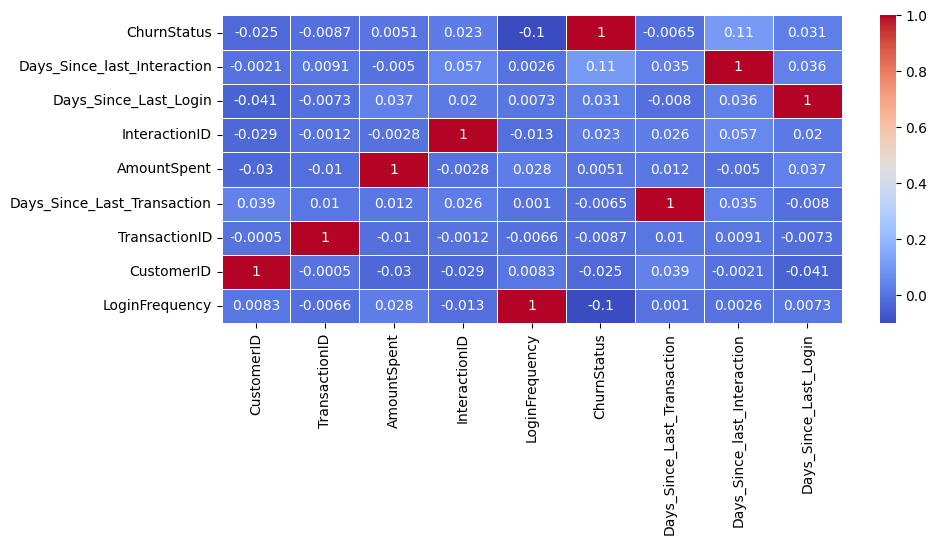

In [10]:
# calculate the correlation matrix
corr = num_df.corr()

# Sort the correlated values 
sort_corr = corr.sort_values(by='ChurnStatus', ascending=False)

# show the correlation heatmap of the numerical variable to the target variable (ChurnStatus)
plt.figure(figsize=(10, 4))
sns.heatmap(sort_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.show()

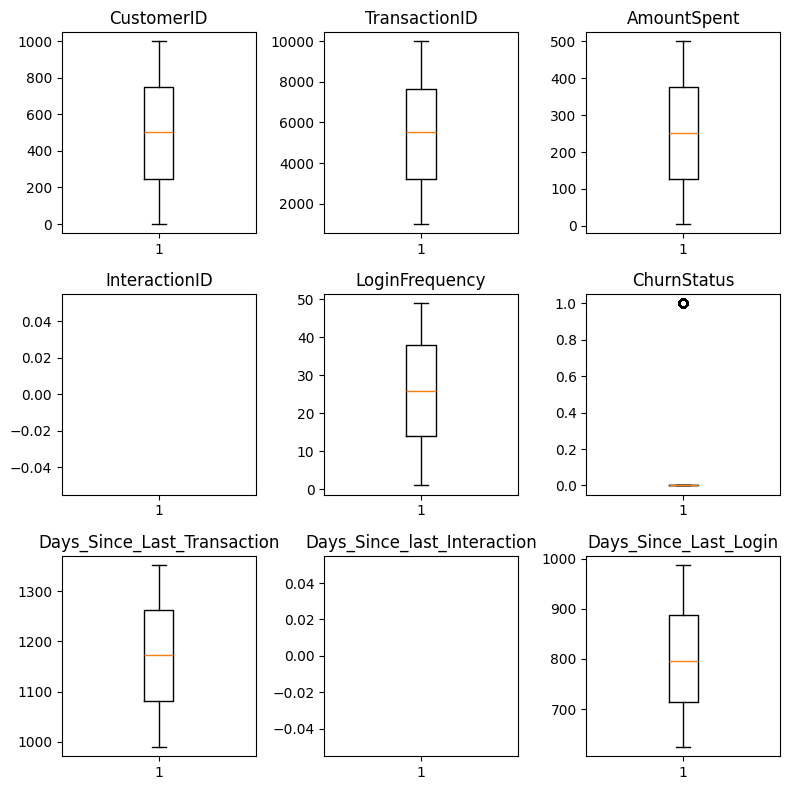

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(8,8))

# Flatten the 2D array to 1D array for easy iteration
axs = axs.flatten()

#loop through the subpolots
for i, col in enumerate(num_df.columns): 
    axs[i].boxplot(num_df[col])
    axs[i].set_title(f'{col}')
    
plt.tight_layout()      
plt.show()
    

### Visualising Categorical Variables

In [75]:
cat_df.dtypes

ProductCategory     object
InteractionType     object
ResolutionStatus    object
ServiceUsage        object
ChurnStatus         object
dtype: object

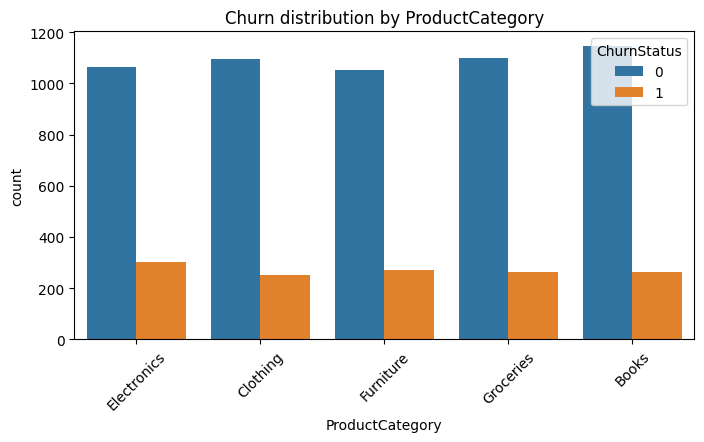

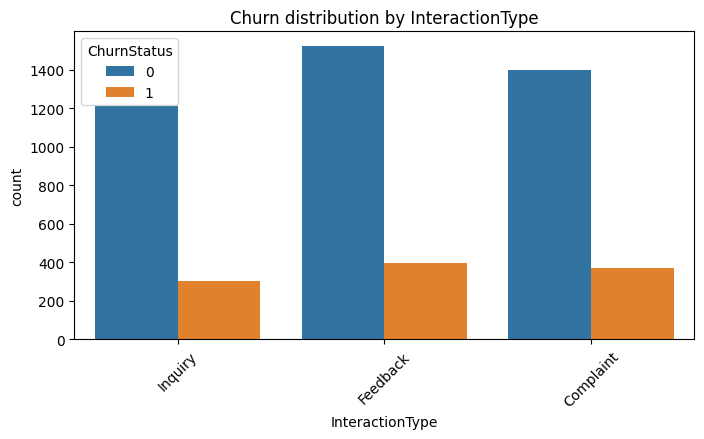

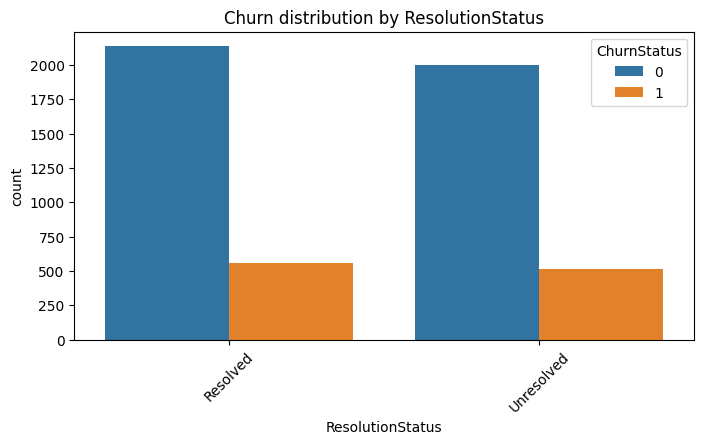

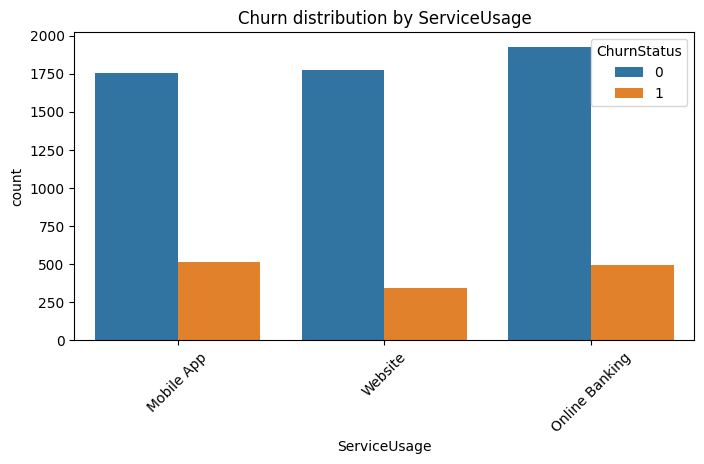

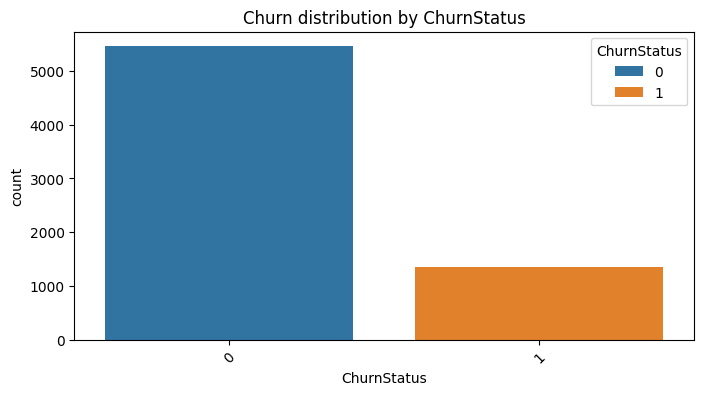

In [84]:
# convert the ChurnStatus into object data type 
merged_copy['ChurnStatus'] = merged_copy['ChurnStatus'].astype('object')

# Extract only categorical variables  
cat_df = merged_copy.select_dtypes(include='object')

# loop through the categorical varables to determine 'ChurnStatus' distribution
for col in cat_df: 
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='ChurnStatus', data=cat_df) 
    plt.title(f'Churn distribution by {col}') 
    plt.xticks(rotation=45) 
    plt.show()


### Hypotheses for Chi-Square Test

**Null Hypothesis (H0):**
There is no association between the predictor and ChurnStatus (i.e., they are independent)

**Alternative Hypothesis (H1):**  
There is an association between the predictor and ChurnStatus (i.e., they are dependent)

In [13]:
# carrying out test to determine the association between predictors and the response variables 
from scipy.stats import chi2_contingency

for col in cat_df: 
    if col != 'ChurnStatus': 
        #create a contingency table 
        contigency_table = pd.crosstab(merged_copy[col], merged_copy['ChurnStatus'])

        # Apply Chi-Square test 
        chi2, p, dof, ex = chi2_contingency(contigency_table)

        # Display result 
        print(f"Chi-Square Test for '{col}' vs ChurnStatus") 
        print(f'Chi2 Result: {chi2:.2f}, p-value: {p:.4f}') 
        if p<0.05: 
            print(f"There is a significant association (Reject H0)")

        else: 
             print(f"No significant association (Fail to Reject H0)\n")

Chi-Square Test for 'ProductCategory' vs ChurnStatus
Chi2 Result: 7.37, p-value: 0.1176
No significant association (Fail to Reject H0)

Chi-Square Test for 'InteractionType' vs ChurnStatus
Chi2 Result: 0.38, p-value: 0.8289
No significant association (Fail to Reject H0)

Chi-Square Test for 'ResolutionStatus' vs ChurnStatus
Chi2 Result: 0.04, p-value: 0.8501
No significant association (Fail to Reject H0)

Chi-Square Test for 'ServiceUsage' vs ChurnStatus
Chi2 Result: 29.48, p-value: 0.0000
There is a significant association (Reject H0)


In [14]:
# overwrite 'merged_df' with 'merged_copy' 
merged_df = merged_copy.copy()

merged_df = merged_df.drop(['CustomerID', 'TransactionID', 'TransactionDate', 'InteractionID',
                            'InteractionDate', 'InteractionType', 'ResolutionStatus', 'LastLoginDate'], axis=1) 

merged_df                              

,AmountSpent,ProductCategory,LoginFrequency,ServiceUsage,ChurnStatus,Days_Since_Last_Transaction,Days_Since_last_Interaction,Days_Since_Last_Login
0,416.50,Electronics,34,Mobile App,0,1268,1264.0,695
1,54.96,Clothing,5,Website,1,1134,1278.0,650
2,197.50,Electronics,5,Website,1,1148,1278.0,650
3,101.31,Furniture,5,Website,1,1329,1278.0,650
4,397.37,Clothing,5,Website,1,1149,1278.0,650
...,...,...,...,...,...,...,...,...
6807,232.06,Groceries,22,Mobile App,0,1103,NaN,764
6808,324.98,Books,22,Mobile App,0,1007,NaN,764
6809,375.34,Groceries,22,Mobile App,0,1188,NaN,764
6810,166.73,Books,22,Mobile App,0,1256,NaN,764


### Data Preparatation / Cleaning 

In [15]:
dfSummary(merged_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,AmountSpent[float64],Mean (sd) : 251.6 (142.9)min < med < max:5.2 < 251.8 < 499.9IQR (CV) : 248.2 (1.8),"4,797 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkhJREFUeJzt2kHOmkAchvGZikrVQIyN7rxAky5ccogetkf4TDyBN3BnQghEKhGRhqabbr4oqPDq81uLM4bnzxijLcvSAF33pe0NANdwzIuy1n41xgwavMWpLMvjHbeErobaVizVurPZ7KfnedO6CydJEllrfxHri4faciyDat0gCI6+72e3rhvHsbvZbKZhGFZDdnyXk8B2+BRyHrh5bzKZzIMgSNqKpVp3Pp//rnOtMab63E/V5nDbjp9CzqM2n+e5WxTF9+Fw+FE3lqIovCp4a+2tl3qXy6VvWiI63IOmp9B6vZ6HYfjNWpvc+2nsPGrzu91uut1uR+fzuWdqSNO0n+f5j+Vy2ev1elmdIcmy7MMYU/eJWov6cPu+H9VZu8n9uuZp7DzqCI2iqNHReTqdHNd1R6vVKlssFtEzh6ShtxzuU4P7dc1J0Pmfp8bj8dOH5B7edbjHNe7XP59+9s6H2paiKPqK34+Vh/szhPpC349fGaF29AjF/wj1zY5QVfwpBRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRKca14Ux7F76xsfDoe/16Rp6u73+9Ezr1ddW3XfpuH11/T1B4Icn7o/ST3DAAAAAElFTkSuQmCC"">",0(0.0%)
2,ProductCategory[object],1. Books2. Electronics3. Groceries4. Clothing5. Furniture,"1,408 (20.7%)1,366 (20.1%)1,366 (20.1%)1,348 (19.8%)1,324 (19.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAfhJREFUeJzt20GKGkEAhtHqICHZKIPgYTxEDptDeBsZdJEJ2Rj6El+B9d5itj2Lj25K6t9er9eAwrfkKSA2SmIjs40xfo4xvo95/r1er6+JzydyOJ/Pv47H48eY5Pl8fm7b9ltw7++wh3a9Xr9Op9Pf+uGPx+PH7Xb7uN/v+5tVbG/usP/ZQ7tcLn8m/Q/7Z5wFOCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbHR3vrYr/qMCWY9lzkO++XF/U7ZrKs++/P327oznk3LtXAym90oFQcElvmM+oQuZOq6yrJqLdPWVZZV65m9rrKsWogDAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG++/rrKsWs/UdZVl1VpcCydjXUXGAYGMzygZ6yoy1lVkrKvIOCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxrVwMtZVZLzZyBi8kDF4IWPwQsaPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRkbBDLWVSzxZvNWW8y0dZVl1XqmrKssq9Y0c11lWbUYP+qSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERvvva6yrFrTtHWVZdV6bBDIWFeRcUAgIzZG5T/HMQ4328jGyAAAAABJRU5ErkJggg=="">",0(0.0%)
3,LoginFrequency[int64],Mean (sd) : 25.7 (14.1)min < med < max:1.0 < 26.0 < 49.0IQR (CV) : 24.0 (1.8),49 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAptJREFUeJzt3b1u2lAAhuFjcCIHkC1+ChtLx0gdLLFwAR17sb2EDAydGbp0YkNCCIQLwhhXroLUdkiwjZPzue8z5wQPr/D5U+KkaWoA2zXe+wGAa7hX/RRycRznwRhzX3D4MU3T/Y0fSR6hVhBpv9//4vt+t8j47Xa7dhznK7H+jVBv7z6LdDqd7oMgOOQZuNlsvNls1l2tVtm38V7sTVDp24BQK5JFOhwOf+YdlySJb4zxHccps+44Fxjn9Xq9z0EQtIt+cJVvA0K1SBRFd3EcfxqPx81ms5nr2ziTJMldFEUfO53Oj0ajEZsc4jj2jDGPk8nk22Aw2Jqcqn4bEKpFjsej63leKwzDw2g0Wucdv1gsuvP5/EMYht/zjn8e2/I8Ly7yJniWTR0qQagWarfbhaYN6/X6oej4y1hbsY8KCYQKCYQKCYQKCW7Fm8BF9/QuOE7E66GWOQ4ss6d3wXEirv1GLXwcWGZPz4bjRNjFreo4sMye3h+s3tvD22HDHzeTTfdK3FN4cT1CqLDinsJr6xFCxbvfU7hmPVLbUG2+W1ln7eJrkhfXI25N5zxW361Efm4d5zy2361EjUItM+ex/W4lahTqRR3vViI/LqVAAqFCAqFCAqFCAqFCgvWrfsHDBv98PmdjcUOEWsFhQ5Ikj4fD4ckYU3QPF/8g1IoOG06nU7O6J/z/EOoLOGywB4spSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBU1Odv+Gf/FjzvL97tdr/HRFHkLZfL1luOV/1s1ec2Jcdf09cvtViEYb/5ilIAAAAASUVORK5CYII="">",0(0.0%)
4,ServiceUsage[object],1. Online Banking2. Mobile App3. Website,"2,419 (35.5%)2,273 (33.4%)2,120 (31.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYRJREFUeJzt20FKw1AUheEbKaKTFil0MV2Ei3UR3U2RdqDiJPJwD8e86/cNnJrAT9qUd5Z1XQsSHiL/Bapqqarnqnqsnr7Xdf3864vg1+54PL7u9/uXauh+v78vy/ImuG3YjdDO5/

In [16]:
# Checking rows with Nan values
merged_df.head(40)


,AmountSpent,ProductCategory,LoginFrequency,ServiceUsage,ChurnStatus,Days_Since_Last_Transaction,Days_Since_last_Interaction,Days_Since_Last_Login
0,416.50,Electronics,34,Mobile App,0,1268,1264.0,695
1,54.96,Clothing,5,Website,1,1134,1278.0,650
2,197.50,Electronics,5,Website,1,1148,1278.0,650
3,101.31,Furniture,5,Website,1,1329,1278.0,650
4,397.37,Clothing,5,Website,1,1149,1278.0,650
5,285.21,Electronics,5,Website,1,1345,1278.0,650
6,311.34,Electronics,5,Website,1,1095,1278.0,650
7,199.73,Groceries,5,Website,1,1031,1278.0,650
8,241.06,Books,3,Website,0,1073,1118.0,670
9,51.07,Clothing,3,Website,0,1127,1118.0,670


In [17]:
# convert target column to numerical data type
merged_df['ChurnStatus']= merged_df['ChurnStatus'].astype('int')
merged_df.dtypes

AmountSpent                    float64
ProductCategory                 object
LoginFrequency                   int64
ServiceUsage                    object
ChurnStatus                      int32
Days_Since_Last_Transaction      int64
Days_Since_last_Interaction    float64
Days_Since_Last_Login            int64
dtype: object

In [18]:
# import the relevant library
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 

In [19]:
# fill missing values using mean strategiy 
numimputer = SimpleImputer(missing_values=np.nan, strategy="mean")
merged_df['Days_Since_last_Interaction'] = numimputer.fit_transform(merged_df[['Days_Since_last_Interaction']]) 
merged_df.isnull().sum()

AmountSpent                    0
ProductCategory                0
LoginFrequency                 0
ServiceUsage                   0
ChurnStatus                    0
Days_Since_Last_Transaction    0
Days_Since_last_Interaction    0
Days_Since_Last_Login          0
dtype: int64

[array(['Books', 'Clothing', 'Electronics', 'Furniture', 'Groceries'],
       dtype=object),
 array(['Mobile App', 'Online Banking', 'Website'], dtype=object)]

In [20]:
#converting catgeorical variables using onehotencoder
onehotencoder = preprocessing.OneHotEncoder(drop='first', sparse_output=False) 
preprocessed_variable = onehotencoder.fit_transform(merged_df[['ProductCategory', 'ServiceUsage']])

# create an empty list to store new columns from the transformation of the categorical variable 
new_cols = [] 
for col in onehotencoder.categories_: 
    new_cols.extend(col[1:])

# convert the encoded array to dataframe 
onehot_df = pd.DataFrame(preprocessed_variable, columns=new_cols)

#join original dataframe with the new one 
join_df = merged_df.join(onehot_df)

#display new dataframe 
join_df

,AmountSpent,ProductCategory,LoginFrequency,ServiceUsage,ChurnStatus,Days_Since_Last_Transaction,Days_Since_last_Interaction,Days_Since_Last_Login,Clothing,Electronics,Furniture,Groceries,Online Banking,Website
0,416.50,Electronics,34,Mobile App,0,1268,1264.000000,695,0.0,1.0,0.0,0.0,0.0,0.0
1,54.96,Clothing,5,Website,1,1134,1278.000000,650,1.0,0.0,0.0,0.0,0.0,1.0
2,197.50,Electronics,5,Website,1,1148,1278.000000,650,0.0,1.0,0.0,0.0,0.0,1.0
3,101.31,Furniture,5,Website,1,1329,1278.000000,650,0.0,0.0,1.0,0.0,0.0,1.0
4,397.37,Clothing,5,Website,1,1149,1278.000000,650,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,232.06,Groceries,22,Mobile App,0,1103,1171.311683,764,0.0,0.0,0.0,1.0,0.0,0.0
6808,324.98,Books,22,Mobile App,0,1007,1171.311683,764,0.0,0.0,0.0,0.0,0.0,0.0
6809,375.34,Groceries,22,Mobile App,0,1188,1171.311683,764,0.0,0.0,0.0,1.0,0.0,0.0
6810,166.73,Books,22,Mobile App,0,1256,1171.311683,764,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# drop redundand column 
ml_df = join_df.drop(['ProductCategory', 'ServiceUsage'], axis=1)

#display result 
ml_df

,AmountSpent,LoginFrequency,ChurnStatus,Days_Since_Last_Transaction,Days_Since_last_Interaction,Days_Since_Last_Login,Clothing,Electronics,Furniture,Groceries,Online Banking,Website
0,416.50,34,0,1268,1264.000000,695,0.0,1.0,0.0,0.0,0.0,0.0
1,54.96,5,1,1134,1278.000000,650,1.0,0.0,0.0,0.0,0.0,1.0
2,197.50,5,1,1148,1278.000000,650,0.0,1.0,0.0,0.0,0.0,1.0
3,101.31,5,1,1329,1278.000000,650,0.0,0.0,1.0,0.0,0.0,1.0
4,397.37,5,1,1149,1278.000000,650,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6807,232.06,22,0,1103,1171.311683,764,0.0,0.0,0.0,1.0,0.0,0.0
6808,324.98,22,0,1007,1171.311683,764,0.0,0.0,0.0,0.0,0.0,0.0
6809,375.34,22,0,1188,1171.311683,764,0.0,0.0,0.0,1.0,0.0,0.0
6810,166.73,22,0,1256,1171.311683,764,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
count_values = ml_df['ChurnStatus'].value_counts()
count_values

ChurnStatus
0    5460
1    1352
Name: count, dtype: int64

<Axes: xlabel='ChurnStatus', ylabel='count'>

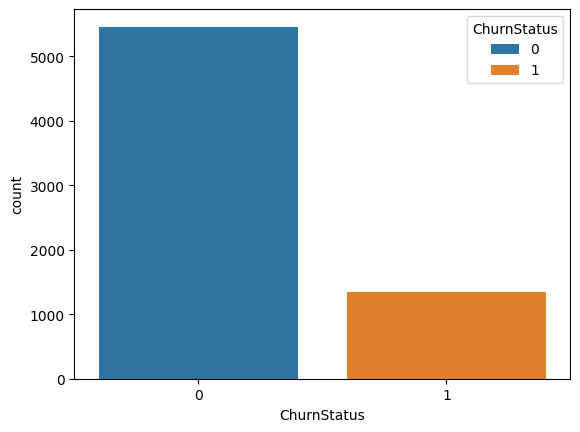

In [86]:
# visualise the target column 
sns.countplot(data=ml_df, x='ChurnStatus', hue='ChurnStatus')

In [25]:
# Filter the dataset for training and testing 
x = ml_df.drop('ChurnStatus', axis=1) 
y = ml_df['ChurnStatus'] 

In [26]:
# split the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
#Apply class balancing 
#use smote method 
resampler = SMOTE(random_state=42) 
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train) 

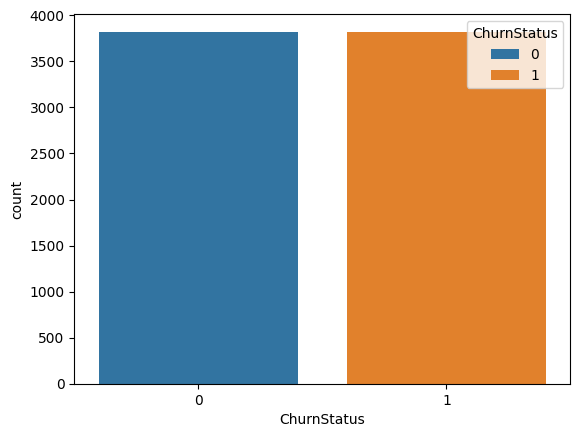

In [89]:
#visualise the balanced class
sns.countplot(x=y_train_smote, hue = y_train_smote) 
plt.show() 

### Implementing Stacking Machine Learning Method 

In [29]:
# define base estimator for stacking
base_learners = [ 
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)), 
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

In [30]:
# Define final estimator with scaling inside the pipelne 
final_estimator=Pipeline([
        ('standardscaler', StandardScaler()),
        ('logisticregression', LogisticRegression(class_weight='balanced', random_state=42))
    ])

In [31]:
# Define the stacking model
stack_model = StackingClassifier( 
    estimators=base_learners, 
    final_estimator=final_estimator     
)

In [32]:
# fit stack_model
stack_model.fit(x_train_smote, y_train_smote)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=Pipeline(steps=[('standardscaler',
                                                    StandardScaler()),
                                                   ('logisticregression',
                                                    LogisticRegression(class_weight='balanced',
                                                                       random_state=42))]))

In [33]:
# make prediction on the raw test data  
y_pred = stack_model.predict(x_test)

### Model Evaluation 

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%\n") 
cm = metrics.confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:")
print(cm, '\n\n') 
print("-------------------------------------------------------------------------")
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n") 
print(result)

Accuracy Score: 88.50%

Confusion Matrix:
[[1574   64]
 [ 171  235]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1638
           1       0.79      0.58      0.67       406

    accuracy                           0.89      2044
   macro avg       0.84      0.77      0.80      2044
weighted avg       0.88      0.89      0.88      2044



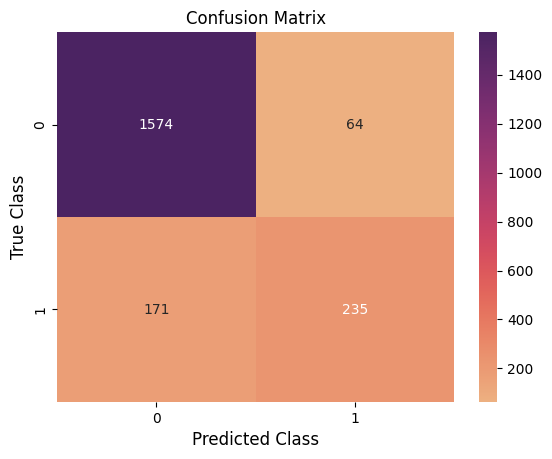

In [35]:
#visualising the confusion matrix 
cm = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

### Apply SHAP to explain feature contribution

In [36]:
import shap

# Access the trained base learners
rf_model = stack_model.named_estimators_['rf']
gb_model = stack_model.named_estimators_['gb']

meta_rf = rf_model.predict_proba(x_train_smote)[:, 1]
meta_gb = gb_model.predict_proba(x_train_smote)[:, 1]

# create a dataframe 
meta_df = pd.DataFrame({
    'Random_Forest': meta_rf, 
    'Gradient_Boosting': meta_gb
}) 

meta_df.head()

,Random_Forest,Gradient_Boosting
0,0.18,0.690507
1,0.92,0.346124
2,0.15,0.333554
3,0.04,0.231306
4,0.11,0.177572


In [37]:
# being that final_estimator is a pipeline, so fit to meta_df 

final_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42))
])

final_pipe.fit(meta_df, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

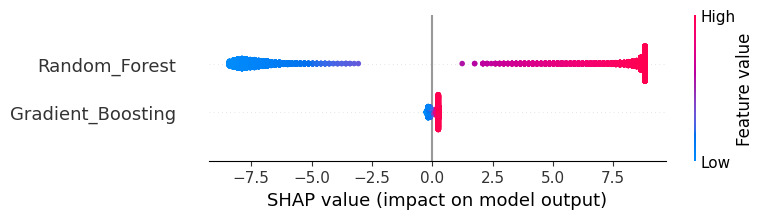

In [38]:
# Transform the meta features using the pipeline's scaler
meta_scaled = final_pipe.named_steps['scaler'].transform(meta_df) 

# Get the logistic regression model
logreg_model = final_pipe.named_steps['logreg'] 

# implement SHAP's LinearExplainer
explainer = shap.Explainer(logreg_model, meta_scaled) 
shap_values = explainer(meta_scaled) 

# SHAP summary plot
shap.summary_plot(shap_values, features=meta_scaled, feature_names=meta_df.columns)



### Implementing Boosting Machine Learning Method 

In [39]:
# initialise XGBoost classifer 
import xgboost as xgb

xg_boost = xgb.XGBClassifier(     
    eval_metric = 'logloss', 
    random_state = 42, 
    n_estimators = 100, 
    max_depth = 5, 
    learning_rate = 0.1
)

In [40]:
# Train the model on the balanced data 
xg_boost.fit(x_train_smote,  y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
# predict the unbalanced dataset
y_pred_xgb = xg_boost.predict(x_test)

In [42]:
# print evaluation report 
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%") 
cm = metrics.confusion_matrix(y_test, y_pred_xgb) 
print("Confusion Matrix:")
print(cm, "\n\n") 
print("-------------------------------------------------------------------------")
result = metrics.classification_report(y_test, y_pred_xgb)
print("Classification Report:\n") 
print(result)

Accuracy Score: 85.47%
Confusion Matrix:
[[1607   31]
 [ 266  140]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1638
           1       0.82      0.34      0.49       406

    accuracy                           0.85      2044
   macro avg       0.84      0.66      0.70      2044
weighted avg       0.85      0.85      0.83      2044



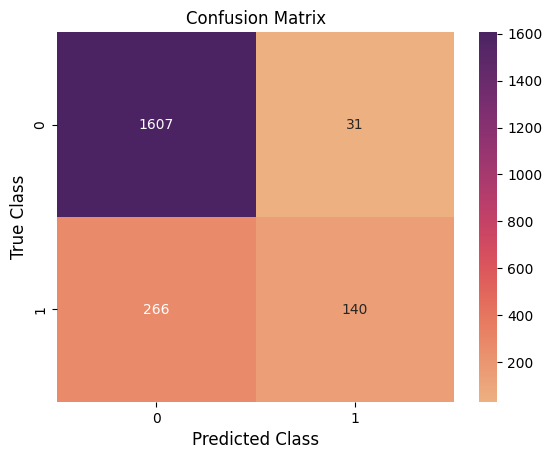

In [43]:
#visualising the confusion matrix 
cm = confusion_matrix(y_test,y_pred_xgb) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

### Implementing K-NN Machine Learning Method 

In [44]:
# Apply Standard Scaler 
scaler = StandardScaler() 
x_train_s = scaler.fit_transform(x_train_smote) 
x_test_s = scaler.transform(x_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier


# initialise estimator
knn = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
}

# setup grid search
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=param_grid,
    cv = 5, 
    scoring = 'f1',  
    n_jobs = -1, 
    verbose=2
)

# fit the model 
grid_search.fit(x_train_s, y_train_smote)

# acquire the best model
best_knn = grid_search.best_estimator_                

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [46]:
# make prediction using the best estimator
knn_pred = best_knn.predict(x_test_s) 


In [47]:
import sys
print(sys.executable)


C:\Users\Orezime Isaac\anaconda3\python.exe


In [48]:
import numpy
print(numpy.__version__)


1.26.4


In [49]:
# print evaluation report 
print(f"Accuracy Score: {accuracy_score(y_test, knn_pred) * 100:.2f}%") 
cm = metrics.confusion_matrix(y_test, knn_pred) 
print("Confusion Matrix:")
print(cm, "\n\n") 
print("-------------------------------------------------------------------------")
result = metrics.classification_report(y_test, knn_pred)
print("Classification Report:\n") 
print(result)

Accuracy Score: 79.26%
Confusion Matrix:
[[1416  222]
 [ 202  204]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1638
           1       0.48      0.50      0.49       406

    accuracy                           0.79      2044
   macro avg       0.68      0.68      0.68      2044
weighted avg       0.80      0.79      0.79      2044



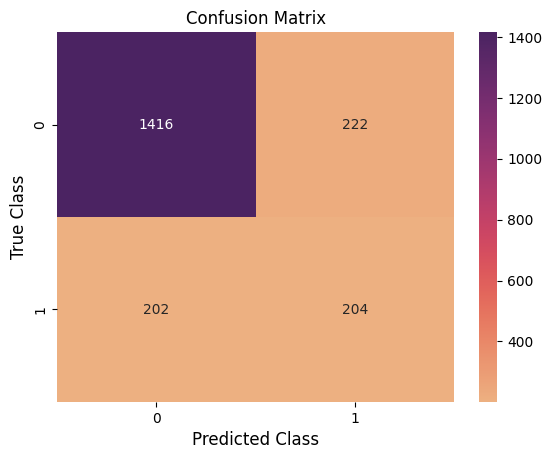

In [50]:
#visualising the confusion matrix 
cm = confusion_matrix(y_test,knn_pred) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

### Implementing Decision Tree Machine Learning Method 

In [51]:
from sklearn.tree import DecisionTreeClassifier

# initialise the classifier
dt = DecisionTreeClassifier(random_state=42) 

param_grid_dt = { 
    'max_depth': [3, 5, 10], 
    'min_samples_split': [2, 5, 10],     
    'criterion': ['gini', 'entropy'] 
}

dt_grid_search = GridSearchCV( 
    estimator=dt, 
    param_grid = param_grid_dt, 
    cv = 5,
    scoring='f1', 
    n_jobs=-1, 
    verbose=2 
)   


In [52]:
# fit the model
dt_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [53]:
# acquire the best model
print(dt_grid_search.best_params_)     # Shows the best hyperparameter combination
print(dt_grid_search.best_score_)      # Shows the best cross-validated score
print(dt_grid_search.best_estimator_)  # The actual best model (fitted)
 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
0.6060542409566866
DecisionTreeClassifier(max_depth=10, random_state=42)


In [54]:
# create a variable for best estimator 
best_dt = dt_grid_search.best_estimator_
dt_pred = best_dt.predict(x_test)

In [55]:
# print evaluation report 
print(f"Accuracy Score: {accuracy_score(y_test, dt_pred) * 100:.2f}%") 
cm = metrics.confusion_matrix(y_test, dt_pred) 
print("Confusion Matrix:")
print(cm, "\n\n") 
print("-------------------------------------------------------------------------")
result = metrics.classification_report(y_test, dt_pred)
print("Classification Report:\n") 
print(result)

Accuracy Score: 87.92%
Confusion Matrix:
[[1616   22]
 [ 225  181]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1638
           1       0.89      0.45      0.59       406

    accuracy                           0.88      2044
   macro avg       0.88      0.72      0.76      2044
weighted avg       0.88      0.88      0.86      2044



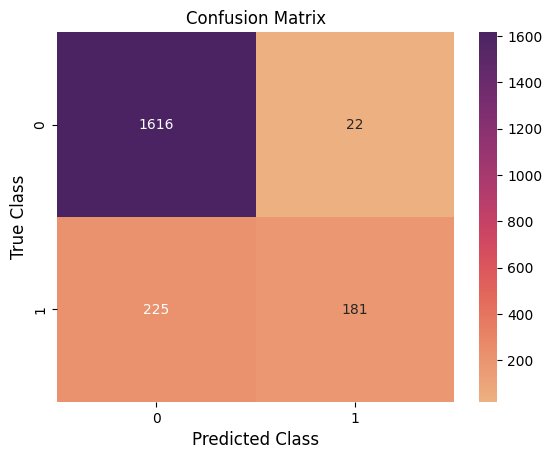

In [56]:
#visualising the confusion matrix 
cm = confusion_matrix(y_test,dt_pred) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()